## wk 3 : Regression algorithm

# Recap



머신 러닝의 학습 방법은 크게 supervised learning과 unsupervised learning으로 나눌 수 있다.  
#### **Supervised learning**
1) Classification (분류) - 데이터가 categorical, discrete한 경우에, data가 속할 클래스를 찾아 분류하고자 할때 사용함.  
2) Regression (회귀)  - 데이터가 continuous한 경우에 대해, feature variable과 target variable의 관계를 찾아낸다. 임의의 숫자를 예측하고자 함.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbblCkC%2FbtqEq8rEkUa%2FLM1DLkUgBku9ApbkTYX90K%2Fimg.png' width='600' height='300'/>

# 1. Linear Regression (선형 회귀)

> 들여쓴 블록



## 1-1. Hypothesis (가설)

**Univariate Linear Regression**(특성이 하나인 선형 회귀)는 비교적 단순하고 성능이 좋다는 장점 때문에 많이 사용되는 대표적인 기법이다.  

**Univariate Linear Regression이란 무엇인가?**  
-하나의 independent variable x를 dependent variable인 y에 map해주는 linear function에 대입하는 model이다.  

쉽게 말해서 hypothesis of linear regression은 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 과정에서 쓰이는 바로 그 직선의 방정식이라고 할 수 있겠다.

$$\mathrm H(x)=Wx + b$$

- $W$ : weight(가중치)
- $b$ : bias(편향)   
- 중학교때 배웠던 직선의 방정식과 연관지어 생각해보면, weight는 기울기를, bias는 y절편에 해당된다.

<img src='https://wikidocs.net/images/page/53560/그림3.PNG' width='500' height='320'/>

In [ ]:
# 드라이브에 접근하기 위해 필요한 라인입니다 (코랩)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

이제 csv파일을 로드하여 선형 회귀를 실습해보자.

In [ ]:
# (1) load dataset (구글 드라이브 주소에 따라 변경)
df = pd.read_csv('/content/drive/MyDrive/prometheus/basic_study/wk3/dataset/Salary_dataset.csv').set_index('Unnamed: 0')

# 데이터 일부 보기
print(df[:5])

            YearsExperience   Salary
Unnamed: 0                          
0                       1.2  39344.0
1                       1.4  46206.0
2                       1.6  37732.0
3                       2.1  43526.0
4                       2.3  39892.0


In [ ]:
# (2) 데이터를 Training Set와 Test Set로 나눠주기.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['YearsExperience'], df['Salary'], test_size=0.4, random_state=42)

# training set와 test set를 2차원 배열로 바꿔준다.
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [ ]:
# (3) LinearRegression 클래스 -> fit(), score(), predict()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Linear Regression 모델을 훈련한다.
lr.fit(X_train, Y_train)

# YearsExperience : 5.0 에 대해 예측한다.
print(lr.predict([[5.0]]))

[72303.50533756]


- 위에서 살펴봤다시피 선형회귀에서 가중치(weight)는 직선의 기울기를, 편향(bias)는 직선의 y절편에 해당한다.
- 머신러닝에서 기울기를 종종 계수(coefficient), 가중치(weight)라고 부른다.
- Weight와 Bias를 모델 파라미터라고 부르고, 결국 많은 머신러닝 알고리즘의 Training 과정은 최적의 모델 파라미터를 구하는 것으로 이해할 수 있다.


In [ ]:
# (4) 직선의 가중치(weight), 편향(bias) 출력하기
print(lr.coef_, lr.intercept_)

[9284.87835182] 25879.113578471923


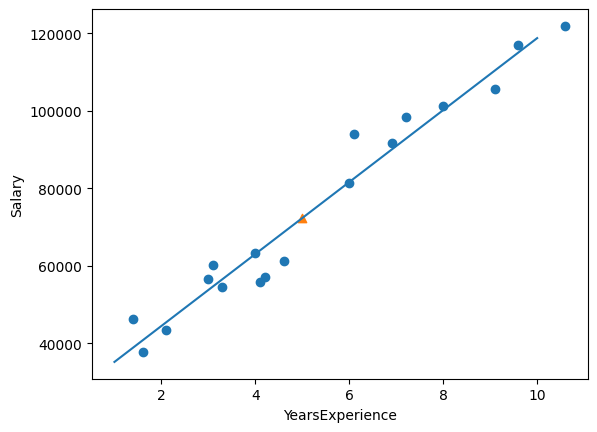

In [ ]:
# 시각화
plt.scatter(X_train, Y_train)
plt.plot([1,10], [1*lr.coef_+lr.intercept_, 10*lr.coef_+lr.intercept_])

plt.scatter(5.0, 72303.5, marker='^')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

# 이제는 Training set 범위에서 벗어난 YearsExperience에 대해서도 Salary를 예측할 수 있게 되는 것이다.

Overfitting과 Underfitting을 확인하기 위해서 결정계수(R^2)를 사용해보자.

In [ ]:
# Overfitting, Underfitting 확인하기
# R^2(결정계수)) 사용하기
print(lr.score(X_train, Y_train))
print(lr.score(X_test, Y_test))

0.9591684852038581
0.9532338376280692


# 2. Polynomial Regression (다항 회귀)
- 다항식을 사용한 선형 회귀를 다항 회귀라고 부른다.
- 분석하고자 하는 데이터의 변수들이 linear한 관계가 아니라 곡선형인 경우 regression model의 함수는 다음과 같이 일반화하여 표현할 수 있다.  

$$\mathrm y = W_{0} + W_{1}x + ... + W_{d}x^d$$  
  
  - d : 데이터 분포의 차원
  - scikit-learn에서 PolynomialFeatures를 사용하면 된다.

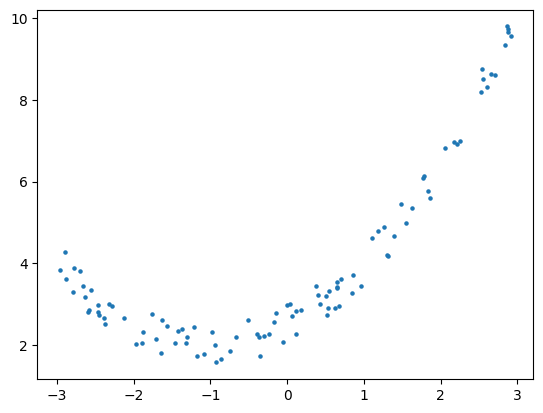

In [ ]:
# 이런 그래프는 일반적인 직선으로 해결하기 어려움.
n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print(poly.get_feature_names_out())
print(x[0])
print(x_poly[0])

['x0' 'x0^2']
[-0.55049435]
[-0.55049435  0.30304403]


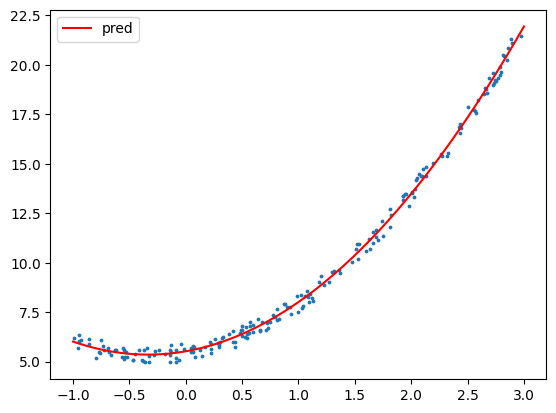

In [ ]:
lr = LinearRegression()
lr.fit(x_poly, y)

# 다항회귀 그래프
xx = np.linspace(-1, 3, 200)
xx_poly = poly.transform(xx.reshape(-1, 1))
y_pred = lr.predict(xx_poly)

plt.scatter(x, y, s=3)
plt.plot(xx, y_pred, 'r', label = 'prediction')
plt.legend()
plt.show()

## 3. Regularization (규제)

모델이 test dataset에 overfitting(과대 적합)하는 것을 막기 위해 사용된다. 선형 회귀의 경우 regularization을 통해 기울기를 조정한다.  

<img src='https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png' width='650' height='200'/>  
Linear regression model에 regularization을 추가한 model을 릿지(ridge)와 라쏘(lasso)라고 부른다.   
1) **Ridge regression** - 계수를 제곱한 값을 기준으로 규제 적용
- L2 Regularization 이용 (L2 norm(aka Euclidean distance)을 이용한 regularization)
- `sklearn.linear_model`에서 `Ridge`를 import해 사용가능하다.  

$$\mathrm J(\theta) = MSE(\theta) + \lambda\sum_{j=0}^{p}\theta{j}^2$$

2) **Lasso regression** - 계수의 절댓값을 기준으로 규제를 적용
- L1 Regularization 이용 (L1 norm(aka Manhattan distance)을 이용한 regularization)
- feature selection이 가능해 가지고 있는 data의 feature에 대해 잘 알고 있을때 사용하면 좋다.
- `sklearn.linear_model`에서 `Lasso`를 import해 사용가능하다.

$$\mathrm J(\theta) = MSE(\theta) + \lambda\sum_{j=0}^{p}|\theta{j}|$$


- $\lambda$ : hyperparameter, regularization의 강도 조절
- hyperparameter : 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
import numpy as np

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing['data'], housing['target'], test_size = 0.4, random_state=0)

lasso = Lasso(alpha=0.3).fit(X_train, y_train) #Ridge로도 변경가능

print("Training Set 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("Test Set 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

Training Set 점수 : 0.50
Test Set 점수 : 0.48
